In [ ]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install pillow
!pip install mtcnn
!pip install tensorflow

In [ ]:
import tensorflow as tf

from tensorflow import keras

from keras.layers import Dense

from tensorflow.compat.v1.keras.backend import set_session

# tf.enable_eager_execution() 

config = tf.compat.v1.ConfigProto()

config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU

config.log_device_placement = False  # to log device placement (on which device the operation ran)

sess = tf.compat.v1.Session(config=config)

set_session(sess)

In [2]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image as im
from mtcnn.mtcnn import MTCNN

In [3]:
#downloaded = drive.CreateFile({'id':"1F24RPp6TRstToH2ozHsvMSWSwYpRG4Ko"})   # replace the id with id of file you want to access
# using scipy.io 
# mat = scipy.io.loadmat('/content/drive/My Drive/wiki_crop2/wiki.mat')


In [4]:
mat = scipy.io.loadmat('wiki/wiki.mat')
instances = mat['wiki'][0][0][0].shape[1]
 
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score"]
 

wiki = pd.DataFrame(index = range(0,instances), columns = columns)
 
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            df[columns[j]] = pd.DataFrame(current_array[j][0])

In [5]:
df

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN
...,...,...,...,...,...,...,...,...
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN
62324,711338,1970,[32/9997032_1947-07-30_1970.jpg],1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN
62326,723893,2011,[00/9999400_1981-12-13_2011.jpg],1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN


### DATA CLEANING

In [ ]:
from datetime import datetime, timedelta

def datenum_to_datetime(datenum):
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    exact_date = datetime.fromordinal(int(datenum)) + timedelta(days=int(days)) + timedelta(hours=int(hours)) + timedelta(minutes=int(minutes)) + timedelta(seconds=round(seconds)) - timedelta(days=366)
    return exact_date.year
df['date_of_birth'] = df['dob'].apply(datenum_to_datetime)

In [7]:
df

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,date_of_birth
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,1981
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,1925
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,1948
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,1930
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,1971
...,...,...,...,...,...,...,...,...,...
62323,707582,1963,[49/9996949_1937-04-17_1963.jpg],1.0,[Guus Haak],"[[128.92773553879837, 128.92773553879837, 320....",4.029268,NaN,1937
62324,711338,1970,[32/9997032_1947-07-30_1970.jpg],1.0,[Nico Rijnders],"[[1, 1, 285, 440]]",-inf,NaN,1947
62325,720620,2013,[09/9998109_1972-12-27_2013.jpg],1.0,[Michael Wiesinger],"[[169.88839785556354, 74.31669471981023, 235.2...",3.494303,NaN,1972
62326,723893,2011,[00/9999400_1981-12-13_2011.jpg],1.0,[Johann Grugger],"[[1, 1, 1, 1]]",-inf,NaN,1981


In [6]:
df['age'] = df['photo_taken'] - df['date_of_birth']

In [7]:
#Data Cleaning 
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]
 
#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]
 
#check threshold
df = df[df['face_score'] >= 3]
 
#some records do not have a gender information
df = df[~df['gender'].isna()]
 
df = df.drop(columns = ['name','face_score','second_face_score','dob'])

In [8]:
#some guys seem to be greater than 100. some of these are paintings. remove these old guys
df = df[df['age'] <= 100]
 
#some guys seem to be unborn in the data set
df = df[df['age'] > 0]

In [10]:
df

,photo_taken,full_path,gender,face_location,date_of_birth,age
0,2009,[17/10000217_1981-05-05_2009.jpg],1.0,"[[111.29109473290997, 111.29109473290997, 252....",1981,28
2,2008,[12/100012_1948-07-03_2008.jpg],1.0,"[[113.52, 169.83999999999997, 366.08, 422.4]]",1948,60
4,2012,[16/10002116_1971-05-31_2012.jpg],0.0,"[[171.61031405173117, 75.57451239763239, 266.7...",1971,41
5,2012,[02/10002702_1960-11-09_2012.jpg],0.0,"[[274.76563240288175, 57.7700900839337, 376.88...",1960,52
6,1971,[41/10003541_1937-09-27_1971.jpg],1.0,"[[79.35580188693945, 26.65993396231315, 197.60...",1937,34
...,...,...,...,...,...,...
62321,1968,[38/9996938_1937-02-15_1968.jpg],1.0,"[[83.1122019227873, 83.1122019227873, 329.2488...",1937,31
62322,1968,[46/9996946_1943-11-01_1968.jpg],1.0,"[[123.45351931209424, 196.99763089935078, 343....",1943,25
62323,1963,[49/9996949_1937-04-17_1963.jpg],1.0,"[[128.92773553879837, 128.92773553879837, 320....",1937,26
62325,2013,[09/9998109_1972-12-27_2013.jpg],1.0,"[[169.88839785556354, 74.31669471981023, 235.2...",1972,41


In [14]:
df

,photo_taken,full_path,gender,face_location,date_of_birth,age,pixels
0,2009,[17/10000217_1981-05-05_2009.jpg],1.0,"[[111.29109473290997, 111.29109473290997, 252....",1981,28,"[252, 252, 240, 252, 252, 240, 253, 253, 241, ..."
2,2008,[12/100012_1948-07-03_2008.jpg],1.0,"[[113.52, 169.83999999999997, 366.08, 422.4]]",1948,60,"[92, 96, 97, 90, 94, 95, 88, 92, 91, 88, 92, 9..."
4,2012,[16/10002116_1971-05-31_2012.jpg],0.0,"[[171.61031405173117, 75.57451239763239, 266.7...",1971,41,"[49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8..."
5,2012,[02/10002702_1960-11-09_2012.jpg],0.0,"[[274.76563240288175, 57.7700900839337, 376.88...",1960,52,"[120, 101, 87, 122, 100, 86, 106, 93, 87, 88, ..."
6,1971,[41/10003541_1937-09-27_1971.jpg],1.0,"[[79.35580188693945, 26.65993396231315, 197.60...",1937,34,"[198, 198, 200, 197, 196, 201, 196, 195, 201, ..."
...,...,...,...,...,...,...,...
62321,1968,[38/9996938_1937-02-15_1968.jpg],1.0,"[[83.1122019227873, 83.1122019227873, 329.2488...",1937,31,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7..."
62322,1968,[46/9996946_1943-11-01_1968.jpg],1.0,"[[123.45351931209424, 196.99763089935078, 343....",1943,25,"[77, 77, 77, 42, 42, 42, 51, 51, 51, 68, 68, 6..."
62323,1963,[49/9996949_1937-04-17_1963.jpg],1.0,"[[128.92773553879837, 128.92773553879837, 320....",1937,26,"[47, 47, 47, 48, 48, 48, 47, 47, 47, 47, 47, 4..."
62325,2013,[09/9998109_1972-12-27_2013.jpg],1.0,"[[169.88839785556354, 74.31669471981023, 235.2...",1972,41,"[142, 176, 100, 142, 176, 100, 142, 176, 100, ..."


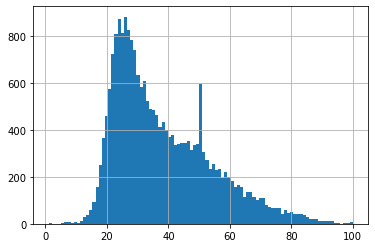

In [12]:
histogram_age = df['age'].hist(bins=df['age'].nunique())


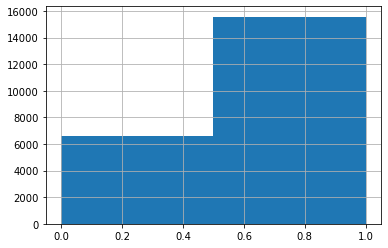

In [20]:
histogram_gender = df['gender'].hist(bins=df['gender'].nunique())

In [16]:
del extractFace

In [14]:
import os
import cv2
def extractFace(imagePath):    
    # load image
    image = cv2.imread('wiki/%s' %imagePath)
    pixels = np.asarray(image, dtype='float16')
    cascader = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # detect faces
    faces = cascader.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)
    for (x,y,w,h) in faces: 
        return pixels[y:y+h, x:x+w]

In [64]:
target_size = (224, 224)
def getImagePixels(image_path):
    img = im.load_img('wiki/%s' % image_path[0], grayscale=False, target_size=target_size)
    x = im.img_to_array(img, dtype='uint8').reshape(1, -1)[0]
    #x = preprocess_input(x)
    return x


In [17]:
def extractFace(pixels, required_size=(224, 224), filename=None):
    # load image from file
#     pixels = plt.imread('wiki/%s' %filename[0])
#     pixels = im.load_img('wiki/%s' % filename[0], grayscale=False,
#                          target_size=required_size)
#     pixels = im.img_to_array(pixels, dtype='float16').reshape(224,224,3)[0]
    pixels = pixels.reshape(224, 224, 3)
    
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
        
    # extract the bounding box from the first face
    if len(results) >= 1:
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        try:
            image = Image.fromarray(face)
            image = image.resize(required_size)
        #     face_array = np.asarray(image, dtype=np.float)
            face_array = np.asarray(image, dtype='float16').reshape(1, -1)[0]
            return face_array
        except ValueError:
            return np.nan
    else:
        return np.nan

In [33]:
df_2

,photo_taken,full_path,gender,face_location,date_of_birth,age,pixels,face_pixels
0,2009,[17/10000217_1981-05-05_2009.jpg],1.0,"[[111.29109473290997, 111.29109473290997, 252....",1981,28,"[252, 252, 240, 252, 252, 240, 253, 253, 241, ...",None
2,2008,[12/100012_1948-07-03_2008.jpg],1.0,"[[113.52, 169.83999999999997, 366.08, 422.4]]",1948,60,"[92, 96, 97, 90, 94, 95, 88, 92, 91, 88, 92, 9...",None
4,2012,[16/10002116_1971-05-31_2012.jpg],0.0,"[[171.61031405173117, 75.57451239763239, 266.7...",1971,41,"[49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8...",None
5,2012,[02/10002702_1960-11-09_2012.jpg],0.0,"[[274.76563240288175, 57.7700900839337, 376.88...",1960,52,"[120, 101, 87, 122, 100, 86, 106, 93, 87, 88, ...",None
6,1971,[41/10003541_1937-09-27_1971.jpg],1.0,"[[79.35580188693945, 26.65993396231315, 197.60...",1937,34,"[198, 198, 200, 197, 196, 201, 196, 195, 201, ...",None
...,...,...,...,...,...,...,...,...
1453,2005,[38/12072338_1984-09-06_2005.jpg],0.0,"[[145.38814972922071, 119.11394068754421, 262....",1984,21,"[74, 55, 59, 62, 56, 56, 59, 57, 58, 72, 55, 6...",None
1454,2008,[42/12072442_1947-01-29_2008.jpg],1.0,"[[175.4105484619978, 97.80586025666544, 349.22...",1947,61,"[8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10, 5, 8, 10...",None
1455,1968,[11/12072811_1946-10-14_1968.jpg],1.0,"[[122.63276041197781, 49.33510416479112, 232.1...",1946,22,"[185, 186, 181, 185, 186, 181, 185, 186, 181, ...",None
1457,2012,[41/12074141_1928-03-03_2012.jpg],1.0,"[[49.41138613764916, 98.11277227529833, 267.85...",1928,84,"[128, 135, 143, 128, 135, 143, 128, 135, 143, ...",None


In [39]:
df_2 = df.iloc[0:99]
df_2['pixels'] =df['pixels'].iloc[0:99]
df_2['face_pixels'] = df_2['pixels'].apply(extractFace)
df_2['face_pixels'] 

plt.imshow(df_2['face_pixels'].values[50].astype('uint8').reshape(224, 224, 3))

df_3 = df.iloc[100:199]
df_3['pixels'] = df['pixels'].iloc[100:199]
df_3['face_pixels'] = df_3['pixels'].apply(extractFace)
df_3['face_pixels'] 

plt.imshow(df_3['face_pixels'].values[50].astype('uint8').reshape(224, 224, 3))

df_4 = df.iloc[200:299]
df_4['pixels'] = df['pixels'].iloc[200:299]
df_4['face_pixels'] = df_4['pixels'].apply(extractFace)
df_4['face_pixels'] 

df_5 = df.iloc[400:499]
df_5['pixels'] = df['pixels'].iloc[400:499]
df_5['face_pixels'] = df_5['pixels'].apply(extractFace)
df_5['face_pixels'] 

df_6 = df.iloc[500:599]
df_6['pixels'] = df['pixels'].iloc[500:599]
df_6['face_pixels'] = df_6['pixels'].apply(extractFace)
df_6['face_pixels'] 

df_7 = df.iloc[600:799]
df_7['pixels'] = df['pixels'].iloc[600:799]
df_7['face_pixels'] = df_7['pixels'].apply(extractFace)
df_7['face_pixels'] 

frames = [df_2, df_3, df_4, df_5, df_6, df_7]
batch_1 = pd.concat(frames)
batch_1

batch_1.to_pickle("batch_1.pkl.compress", compression="gzip")

df_8 = df.iloc[800:999]
df_8['pixels'] = df['pixels'].iloc[800:999]
df_8['face_pixels'] = df_8['pixels'].apply(extractFace)
df_8['face_pixels'] 

plt.imshow(df_8['face_pixels'].values[198].astype('uint8').reshape(224, 224, 3))

df_9 = df.iloc[1000:1099]
df_9['pixels'] = df['pixels'].iloc[1000:1099]
df_9['face_pixels'] = df_9['pixels'].apply(extractFace)
df_9['face_pixels'] 

df_10 = df.iloc[1100:1299]
df_10['pixels'] = df['pixels'].iloc[1100:1299]
df_10['face_pixels'] = df_10['pixels'].apply(extractFace)
df_10['face_pixels'] 

frames = [df_8, df_9, df_10]
batch_2 = pd.concat(frames)
batch_2
batch_2.to_pickle("batch_2.pkl.compress", compression="gzip")

df_11 = df.iloc[1300:1499]
df_11['pixels'] = df['pixels'].iloc[1300:1499]
df_11['face_pixels'] = df_11['pixels'].apply(extractFace)
df_11['face_pixels'] 

df_12 = df.iloc[1600:1699]
df_12['pixels'] = df['pixels'].iloc[1600:1699]
df_12['face_pixels'] = df_12['pixels'].apply(extractFace)
df_12['face_pixels'] 

df_13 = df.iloc[1700:1799]
df_13['pixels'] = df['pixels'].iloc[1700:1799]
df_13['face_pixels'] = df_13['pixels'].apply(extractFace)
df_13['face_pixels'] 

df_13 = df.iloc[1900:2199]
df_13['pixels'] = df['pixels'].iloc[1900:2199]
df_13['face_pixels'] = df_13['pixels'].apply(extractFace)
df_13['face_pixels'] 

df_14 = df.iloc[2200:2399]
df_14['pixels'] = df['pixels'].iloc[2200:2399]
df_14['face_pixels'] = df_14['pixels'].apply(extractFace)
df_14['face_pixels'] 

frames = [df_11, df_12, df_13, df_14]
batch_3 = pd.concat(frames)
batch_3
batch_3.to_pickle("batch_3.pkl.compress", compression="gzip")

df_15 = df.iloc[2600:2699]
df_15['pixels'] = df['pixels'].iloc[2600:2699]
df_15['face_pixels'] = df_15['pixels'].apply(extractFace)
df_15['face_pixels'] 

df_16 = df.iloc[2800:2899]
df_16['pixels'] = df['pixels'].iloc[2800:2899]
df_16['face_pixels'] = df_16['pixels'].apply(extractFace)
df_16['face_pixels'] 

df_17 = df.iloc[2950:2999]
df_17['pixels'] = df['pixels'].iloc[2950:2999]
df_17['face_pixels'] = df_17['pixels'].apply(extractFace)
df_17['face_pixels'] 

df_18 = df.iloc[3000:3159]
df_18['pixels'] = df['pixels'].iloc[3000:3159]
df_18['face_pixels'] = df_18['pixels'].apply(extractFace)
df_18['face_pixels'] 

df_19 = df.iloc[3200:3299]
df_19['pixels'] = df['pixels'].iloc[3200:3299]
df_19['face_pixels'] = df_19['pixels'].apply(extractFace)
df_19['face_pixels'] 

df_20 = df.iloc[3500:3599]
df_20['pixels'] = df['pixels'].iloc[3500:3599]
df_20['face_pixels'] = df_20['pixels'].apply(extractFace)
df_20['face_pixels'] 

df_21 = df.iloc[3800:3899]
df_21['pixels'] = df['pixels'].iloc[3800:3899]
df_21['face_pixels'] = df_21['pixels'].apply(extractFace)
df_21['face_pixels'] 

df_22 = df.iloc[3900:3999]
df_22['pixels'] = df['pixels'].iloc[3900:3999]
df_22['face_pixels'] = df_22['pixels'].apply(extractFace)
df_22['face_pixels'] 

frames = [df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22]
batch_4 = pd.concat(frames)
batch_4
batch_4.to_pickle("batch_4.pkl.compress", compression="gzip")

df_23 = df.iloc[4200:4299]
df_23['pixels'] = df['pixels'].iloc[4200:4299]
df_23['face_pixels'] = df_23['pixels'].apply(extractFace)
df_23['face_pixels'] 

df_24 = df.iloc[4400:4499]
df_24['pixels'] = df['pixels'].iloc[4400:4499]
df_24['face_pixels'] = df_24['pixels'].apply(extractFace)
df_24['face_pixels'] 

df_25 = df.iloc[4700:4799]
df_25['pixels'] = df['pixels'].iloc[4700:4799]
df_25['face_pixels'] = df_25['pixels'].apply(extractFace)
df_25['face_pixels'] 

df_26 = df.iloc[4800:4899]
df_26['pixels'] = df['pixels'].iloc[4800:4899]
df_26['face_pixels'] = df_26['pixels'].apply(extractFace)
df_26['face_pixels'] 

df_27 = df.iloc[4900:4999]
df_27['pixels'] = df['pixels'].iloc[4900:4999]
df_27['face_pixels'] = df_27['pixels'].apply(extractFace)
df_27['face_pixels'] 

df_28 = df.iloc[5000:5199]
df_28['pixels'] = df['pixels'].iloc[5000:5199]
df_28['face_pixels'] = df_28['pixels'].apply(extractFace)
df_28['face_pixels'] 

df_29 = df.iloc[5200:5299]
df_29['pixels'] = df['pixels'].iloc[5200:5299]
df_29['face_pixels'] = df_29['pixels'].apply(extractFace)
df_29['face_pixels'] 

df_30 = df.iloc[5400:5499]
df_30['pixels'] = df['pixels'].iloc[5400:5499]
df_30['face_pixels'] = df_30['pixels'].apply(extractFace)
df_30['face_pixels'] 

df_31 = df.iloc[5500:5599]
df_31['pixels'] = df['pixels'].iloc[5500:5599]
df_31['face_pixels'] = df_31['pixels'].apply(extractFace)
df_31['face_pixels'] 

df_32 = df.iloc[5600:5699]
df_32['pixels'] = df['pixels'].iloc[5600:5699]
df_32['face_pixels'] = df_32['pixels'].apply(extractFace)
df_32['face_pixels'] 

frames = [df_23, df_24, df_25, df_26, df_27, df_28, df_29, df_30, df_31, df_32]
batch_5 = pd.concat(frames)
batch_5
batch_5.to_pickle("batch_5.pkl.compress", compression="gzip")

df_33 = df.iloc[5700:5999]
df_33['pixels'] = df['pixels'].iloc[5700:5999]
df_33['face_pixels'] = df_33['pixels'].apply(extractFace)
df_33['face_pixels'] 

df_33.info()

plt.imshow(df_33['face_pixels'].values[208].astype('uint8').reshape(224, 224, 3))

df_34 = df.iloc[6000:6499]
df_34['pixels'] = df['pixels'].iloc[6000:6499]
df_34['face_pixels'] = df_34['pixels'].apply(extractFace)
df_34['face_pixels'] 

df_34.info()

df_35 = df.iloc[6500:6999]
df_35['pixels'] = df['pixels'].iloc[6500:6999]
df_35['face_pixels'] = df_35['pixels'].apply(extractFace)
df_35['face_pixels'] 

df_35.info()

frames = [df_33, df_34, df_35]
batch_6 = pd.concat(frames)
batch_6.to_pickle('batch_6.pkl.compress', compression='gzip')

df_36 = df.iloc[7000:7999]
df_36['pixels'] = df['pixels'].iloc[7000:7999]
df_36['face_pixels'] = df_36['pixels'].apply(extractFace)
df_36['face_pixels'] 

df_37 = df.iloc[8000:8499]
df_37['pixels'] = df['pixels'].iloc[8000:8499]
df_37['face_pixels'] = df_37['pixels'].apply(extractFace)
df_37['face_pixels'] 

frames = [df_36, df_37]
batch_7 = pd.concat(frames)
batch_7.to_pickle('batch_7.pkl.compress', compression='gzip')

df_38 = df.iloc[8500:9999]
df_38['pixels'] = df['pixels'].iloc[8500:9999]
df_38['face_pixels'] = df_38['pixels'].apply(extractFace)
df_38['face_pixels'] 

df_38.to_pickle('batch_8.pkl.compress', compression='gzip')

df_39 = df.iloc[10000:10599]
df_39['pixels'] = df['pixels'].iloc[10000:10599]
df_39['face_pixels'] = df_39['pixels'].apply(extractFace)
df_39['face_pixels'] 

df_40 = df.iloc[10600:10999]
df_40['pixels'] = df['pixels'].iloc[10600:10999]
df_40['face_pixels'] = df_40['pixels'].apply(extractFace)
df_40['face_pixels'] 

frames =[df_39, df_40]
batch_9 = pd.concat(frames)
batch_9.to_pickle('batch_9.pkl.compress', compression='gzip')

df_41 = df.iloc[11000:11999]
df_41['pixels'] = df['pixels'].iloc[11000:11999]
df_41['face_pixels'] = df_41['pixels'].apply(extractFace)
df_41['face_pixels'] 

# frames =[df_39, df_40]
df_41.to_pickle('batch_10.pkl.compress', compression='gzip')

batch_11 = df.iloc[12000:12999]
batch_11['pixels'] = df['pixels'].iloc[12000:12999]
batch_11['face_pixels'] = batch_11['pixels'].apply(extractFace)
print(batch_11['face_pixels'])
batch_11.to_pickle("batch_11.pkl.compress", compression='gzip')

batch_12 = df.iloc[13000:13999]
batch_12['pixels'] = df['pixels'].iloc[13000:13999]
batch_12['face_pixels'] = batch_12['pixels'].apply(extractFace)
print(batch_12['face_pixels'])
batch_12.to_pickle("batch_12.pkl.compress", compression='gzip')

batch_13 = df.iloc[14000:14999]
batch_13['pixels'] = df['pixels'].iloc[14000:14999]
batch_13['face_pixels'] = batch_13['pixels'].apply(extractFace)
print(batch_13['face_pixels'])
batch_13.to_pickle("batch_13.pkl.compress", compression='gzip')

batch_14 = df.iloc[15000:15999]
batch_14['pixels'] = df['pixels'].iloc[15000:15999]
batch_14['face_pixels'] = batch_14['pixels'].apply(extractFace)
print(batch_14['face_pixels'])
batch_14.to_pickle("batch_14.pkl.compress", compression='gzip')

batch_15 = df.iloc[16000:16999]
batch_15['pixels'] = df['pixels'].iloc[16000:16999]
batch_15['face_pixels'] = batch_15['pixels'].apply(extractFace)
print(batch_15['face_pixels'])
batch_15.to_pickle("batch_15.pkl.compress", compression='gzip')

batch_16 = df.iloc[17000:17999]
batch_16['pixels'] = df['pixels'].iloc[17000:17999]
batch_16['face_pixels'] = batch_16['pixels'].apply(extractFace)
print(batch_16['face_pixels'])
batch_16.to_pickle("batch_16.pkl.compress", compression='gzip')

batch_17 = df.iloc[18000:18999]
batch_17['pixels'] = df['pixels'].iloc[18000:18999]
batch_17['face_pixels'] = batch_17['pixels'].apply(extractFace)
print(batch_17.info())
batch_17.to_pickle("batch_17.pkl.compress", compression='gzip')

batch_18 = df.iloc[19000:19999]
batch_18['pixels'] = df['pixels'].iloc[19000:19999]
batch_18['face_pixels'] = batch_18['pixels'].apply(extractFace)
print(batch_18.info())
batch_18.to_pickle("batch_18.pkl.compress", compression='gzip')

batch_19 = df.iloc[20000:20999]
batch_19['pixels'] = df['pixels'].iloc[20000:20999]
batch_19['face_pixels'] = batch_19['pixels'].apply(extractFace)
print(batch_19.info())
batch_19.to_pickle("batch_19.pkl.compress", compression='gzip')

batch_20 = df.iloc[21000:21999]
batch_20['pixels'] = df['pixels'].iloc[21000:21999]
batch_20['face_pixels'] = batch_20['pixels'].apply(extractFace)
print(batch_20.info())
batch_20.to_pickle("batch_20.pkl.compress", compression='gzip')

batch_21 = df.iloc[22000:]
batch_21['pixels'] = df['pixels'].iloc[22000:]
batch_21['face_pixels'] = batch_21['pixels'].apply(extractFace)
print(batch_21.info())
batch_21.to_pickle("batch_21.pkl.compress", compression='gzip')

df.iloc[range(0,3), 6]

slices = [range(300,400), range(1500, 1600), range(1800, 1900), range(2400, 2500), range(2500, 2600), range(2700, 2800), range(2900, 2960), range(3160, 3200), range(3300, 3400), range(3400, 3500), range(3600, 3800), range(4300, 4400), range(4500, 4700)]

for i, x in enumerate(slices):
    if i > 0:
        batch_2 = df.iloc[x]
        batch_2['pixels'] = df['pixels'].iloc[x]
        problem_batch = problem_batch.append(batch_2)
    else:
        problem_batch = df.iloc[x]
        problem_batch['pixels'] = df['pixels'].iloc[x]
        

problem_batch

problem_batch['face_pixels'] = problem_batch['pixels'].apply(extractFace)
print(problem_batch.info())
problem_batch.to_pickle("problem_batch.pkl.compress", compression='gzip')

C:\Users\Godswill Ikwan\anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Godswill Ikwan\anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      [31.0, 95.0, 156.0, 29.0, 94.0, 155.0, 27.0, 8...
2      [44.0, 49.0, 42.0, 48.0, 53.0, 46.0, 55.0, 61....
4      [78.0, 31.0, 13.0, 78.0, 31.0, 13.0, 78.0, 31....
5      [215.0, 160.0, 108.0, 214.0, 158.0, 107.0, 212...
6      [117.0, 108.0, 116.0, 113.0, 108.0, 114.0, 102...
                             ...                        
262    [37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38....
266    [19.0, 14.0, 11.0, 19.0, 14.0, 11.0, 20.0, 15....
269    [66.0, 66.0, 66.0, 66.0, 66.0, 66.0, 65.0, 65....
273    [201.0, 215.0, 225.0, 203.0, 216.0, 226.0, 207...
275    [103.0, 76.0, 46.0, 104.0, 77.0, 47.0, 104.0, ...
Name: face_pixels, Length: 99, dtype: object

### CREATING TRAIN AND LAP DATASETS

#### TRAIN SET

In [7]:
# df['pixels'] =pd.read_pickle("data.pkl.compress", compression="gzip")
# df['pixels'].to_pickle("data.pkl.compress", compression="gzip")
import os

def loadDataBatches(path):
    # load batch pkl files using pickle reader
    batches = os.listdir(path)
    for i, batchPath in enumerate(batches):
        if i>0: 
            batch2 = pd.read_pickle('%s\%s'%(path, batchPath), compression='gzip')
            batch1 = batch1.append(batch2)
        else:
            batch1 = pd.read_pickle('%s\%s'%(path, batchPath), compression='gzip')
    return batch1 


In [8]:
FinalBatch = loadDataBatches("C:\\Users\\Godswill Ikwan\\Documents\\Project\\NEW\\Dataset\\databatches")

FinalBatch

,photo_taken,full_path,gender,face_location,date_of_birth,age,pixels,face_pixels
0,2009,[17/10000217_1981-05-05_2009.jpg],1.0,"[[111.29109473290997, 111.29109473290997, 252....",1981,28,"[252, 252, 240, 252, 252, 240, 253, 253, 241, ...","[31.0, 95.0, 156.0, 29.0, 94.0, 155.0, 27.0, 8..."
2,2008,[12/100012_1948-07-03_2008.jpg],1.0,"[[113.52, 169.83999999999997, 366.08, 422.4]]",1948,60,"[92, 96, 97, 90, 94, 95, 88, 92, 91, 88, 92, 9...","[44.0, 49.0, 42.0, 48.0, 53.0, 46.0, 55.0, 61...."
4,2012,[16/10002116_1971-05-31_2012.jpg],0.0,"[[171.61031405173117, 75.57451239763239, 266.7...",1971,41,"[49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8...","[78.0, 31.0, 13.0, 78.0, 31.0, 13.0, 78.0, 31...."
5,2012,[02/10002702_1960-11-09_2012.jpg],0.0,"[[274.76563240288175, 57.7700900839337, 376.88...",1960,52,"[120, 101, 87, 122, 100, 86, 106, 93, 87, 88, ...","[215.0, 160.0, 108.0, 214.0, 158.0, 107.0, 212..."
6,1971,[41/10003541_1937-09-27_1971.jpg],1.0,"[[79.35580188693945, 26.65993396231315, 197.60...",1937,34,"[198, 198, 200, 197, 196, 201, 196, 195, 201, ...","[117.0, 108.0, 116.0, 113.0, 108.0, 114.0, 102..."
...,...,...,...,...,...,...,...,...
13084,1943,[57/2120557_1916-05-06_1943.jpg],1.0,"[[156.89062005906774, 104.8870800393785, 312.0...",1916,27,"[87, 87, 87, 79, 79, 79, 87, 87, 87, 77, 77, 7...","[95.0, 95.0, 95.0, 94.0, 94.0, 94.0, 93.0, 93...."
13085,2014,[68/212068_1940-09-07_2014.jpg],1.0,"[[113.52, 113.52, 366.08, 366.08]]",1940,74,"[81, 133, 172, 79, 131, 170, 79, 131, 170, 78,...","[147.0, 147.0, 143.0, 153.0, 152.0, 148.0, 170..."
13087,2008,[32/21207432_1971-04-12_2008.jpg],0.0,"[[190.23806442241082, 111.35553757973965, 331....",1971,37,"[52, 56, 55, 53, 57, 56, 53, 55, 54, 57, 59, 5...","[50.0, 40.0, 34.0, 49.0, 40.0, 34.0, 49.0, 40...."
13088,2014,[99/21207499_1982-03-24_2014.jpg],1.0,"[[138.11816488834953, 160.9911923697411, 343.0...",1982,32,"[249, 187, 100, 248, 189, 99, 247, 188, 98, 24...","[87.0, 85.0, 65.0, 86.0, 84.0, 64.0, 82.0, 79...."


In [9]:
finalBatch = FinalBatch[FinalBatch['face_pixels'].notna()]

In [10]:
finalBatch.drop(columns=['photo_taken', 'face_location', 'date_of_birth'], inplace=True)

C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
finalBatch['face_pixels']/=255

C:\Users\Godswill Ikwan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
finalBatch

In [ ]:
finalBatch.to_pickle('final_df.pkl.compress', compression='gzip')

In [8]:
finalBatch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21463 entries, 0 to 13090
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_path    21463 non-null  object 
 1   gender       21463 non-null  float64
 2   age          21463 non-null  int64  
 3   pixels       21463 non-null  object 
 4   face_pixels  21463 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1006.1+ KB


In [ ]:
df.memory_usage()
df['pixels'].memory_usage()

#### LAP SET

In [3]:
def LAPdatawork(path):
    ''' Function to extract face from datafram segments'''
    # read LAP batch
    LAP_data = pd.read_pickle('{}'.format(path), compression='gzip')
    # apply extract face function
    LAP_data['face_pixels'] = LAP_data['pixels'].apply(extractFace)
    # overwrite and save new pickle file with face_pixels
    LAP_data.to_pickle('{}'.format(path), compression='gzip')
    return LAP_data

def loadLAP(path):
    ''' Function to load data batches and concat'''
    batches = os.listdir(path)
    for i, batchPath in enumerate(batches):
        if i>0: 
            batch2 = pd.read_pickle('%s\%s'%(path, batchPath), compression='gzip')
            batch1 = batch1.append(batch2)
        else:
            batch1 = pd.read_pickle('%s\%s'%(path, batchPath), compression='gzip')
    return batch1 

In [ ]:
LAP_data = loadLAP(Path('LAP/LAP batches/'))

In [ ]:
LAP_data = LAP_data[LAP_data['face_pixels'].notna()]
LAP_data

In [18]:
LAP_data = pd.read_pickle('LAP_data.pkl.compress', compression='gzip')

In [19]:
LAP_data

,image,mean,stdv,pixels,face_pixels
0,003856.jpg,35.406250,4.609375,"[238, 205, 4, 238, 205, 6, 238, 205, 6, 238, 2...","[110.0, 83.0, 68.0, 108.0, 79.0, 65.0, 100.0, ..."
1,001060.jpg,35.468750,4.902344,"[212, 213, 208, 213, 214, 209, 214, 214, 212, ...","[82.0, 62.0, 58.0, 83.0, 63.0, 59.0, 83.0, 64...."
2,003987.jpg,20.140625,3.671875,"[188, 175, 166, 189, 176, 167, 191, 179, 167, ...","[13.0, 14.0, 9.0, 13.0, 14.0, 9.0, 13.0, 14.0,..."
3,002290.jpg,68.562500,7.203125,"[129, 102, 85, 130, 103, 86, 130, 103, 86, 131...","[146.0, 115.0, 95.0, 148.0, 117.0, 96.0, 153.0..."
4,001969.jpg,28.937500,6.703125,"[104, 101, 92, 198, 190, 177, 199, 190, 173, 1...","[41.0, 27.0, 26.0, 37.0, 23.0, 22.0, 29.0, 15...."
...,...,...,...,...,...
4107,001891.jpg,19.390625,3.847656,"[251, 252, 246, 251, 252, 246, 251, 252, 246, ...","[152.0, 98.0, 57.0, 153.0, 98.0, 57.0, 153.0, ..."
4108,001756.jpg,2.974609,0.891113,"[2, 84, 140, 1, 86, 141, 0, 85, 140, 3, 88, 14...","[53.0, 49.0, 45.0, 52.0, 46.0, 45.0, 50.0, 42...."
4109,000101.jpg,9.812500,1.652344,"[129, 120, 91, 129, 120, 89, 131, 122, 91, 133...","[202.0, 193.0, 162.0, 202.0, 193.0, 162.0, 202..."
4111,000994.jpg,44.031250,5.089844,"[17, 23, 0, 21, 27, 0, 25, 31, 3, 26, 33, 2, 2...","[12.0, 8.0, 0.0, 12.0, 8.0, 0.0, 12.0, 8.0, 0...."


In [4]:
LAP_data['face_pixels'] /= 255
LAP_data['mean']= np.round(LAP_data['mean'])

In [39]:
LAP_data

,image,mean,stdv,pixels,face_pixels
0,003856.jpg,35.406250,4.609375,"[238, 205, 4, 238, 205, 6, 238, 205, 6, 238, 2...","[110.0, 83.0, 68.0, 108.0, 79.0, 65.0, 100.0, ..."
1,001060.jpg,35.468750,4.902344,"[212, 213, 208, 213, 214, 209, 214, 214, 212, ...","[82.0, 62.0, 58.0, 83.0, 63.0, 59.0, 83.0, 64...."
2,003987.jpg,20.140625,3.671875,"[188, 175, 166, 189, 176, 167, 191, 179, 167, ...","[13.0, 14.0, 9.0, 13.0, 14.0, 9.0, 13.0, 14.0,..."
3,002290.jpg,68.562500,7.203125,"[129, 102, 85, 130, 103, 86, 130, 103, 86, 131...","[146.0, 115.0, 95.0, 148.0, 117.0, 96.0, 153.0..."
4,001969.jpg,28.937500,6.703125,"[104, 101, 92, 198, 190, 177, 199, 190, 173, 1...","[41.0, 27.0, 26.0, 37.0, 23.0, 22.0, 29.0, 15...."
...,...,...,...,...,...
4107,001891.jpg,19.390625,3.847656,"[251, 252, 246, 251, 252, 246, 251, 252, 246, ...","[152.0, 98.0, 57.0, 153.0, 98.0, 57.0, 153.0, ..."
4108,001756.jpg,2.974609,0.891113,"[2, 84, 140, 1, 86, 141, 0, 85, 140, 3, 88, 14...","[53.0, 49.0, 45.0, 52.0, 46.0, 45.0, 50.0, 42...."
4109,000101.jpg,9.812500,1.652344,"[129, 120, 91, 129, 120, 89, 131, 122, 91, 133...","[202.0, 193.0, 162.0, 202.0, 193.0, 162.0, 202..."
4111,000994.jpg,44.031250,5.089844,"[17, 23, 0, 21, 27, 0, 25, 31, 3, 26, 33, 2, 2...","[12.0, 8.0, 0.0, 12.0, 8.0, 0.0, 12.0, 8.0, 0...."


In [5]:
test_x = []
for i in range(0, LAP_data.shape[0]):
    test_x.append(LAP_data['face_pixels'].values[i])
    
test_x = np.array(test_x)
test_x = test_x.reshape(test_x.shape[0], 224, 224, 3)

test_y = keras.utils.to_categorical(LAP_data['mean'].values, 101)

In [13]:
test_x.shape

(3884, 224, 224, 3)

### Preparing Input and Output 

In [12]:
# stratified sampling age
finalBatch['age_groups'] = pd.cut(finalBatch['age'], bins=[0, 20, 40, 60, 80, 100, np.inf],
                          labels=[1, 2, 3, 4, 5, 6])
# df.head()
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(finalBatch, finalBatch['age_groups']):
#     print(train_index)
    strat_train_split = finalBatch.iloc[train_index]
    strat_test_split = finalBatch.iloc[test_index]

C:\Users\Godswill Ikwan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# for training data
classes = 101 
train_y= keras.utils.to_categorical(strat_train_split['age'].values, classes) # converting to categorical for the labels

train_x = [] 
for i in range(0, strat_train_split.shape[0]):
    train_x.append(strat_train_split['face_pixels'].values[i])
    
train_x = np.array(train_x)
train_x = train_x.reshape(train_x.shape[0],224, 224,3)

In [14]:
# for test data
classes = 101 
test_y = keras.utils.to_categorical(strat_test_split['age'].values, classes) # converting to categorical for the labels

test_x = []
for i in range(0, strat_test_split.shape[0]):
    test_x.append(strat_test_split['face_pixels'].values[i])

test_x = np.array(test_x)
test_x = test_x.reshape(test_x.shape[0], 224, 224, 3)

In [15]:
(valid_x, valid_y) = (test_x[0:3000], test_y[0:3000])
(test_x, test_y) = (test_x[3000:], test_y[3000:])

In [50]:
print('shape of training features:', train_x.shape)
print('shape of test features:', test_x.shape)
print('shape of valid features:', valid_x.shape)

shape of training features: (15024, 224, 224, 3)
shape of test features: (3439, 224, 224, 3)
shape of valid features: (3000, 224, 224, 3)


In [95]:
print('the memory usage of train_x:', train_x.nbytes/1000000000,'Gb')
print('the mmemory usage of test_x:', test_x.nbytes/1000000000,'Gb')

the memory usage of train_x: 4.523065344 Gb
the mmemory usage of test_x: 1.938499584 Gb


In [211]:
import sys
print('the memory usage of train_y:', train_y.__sizeof__())
print('the memory usage of test_x:', test_y.__sizeof__())

the memory usage of train_y: 112
the memory usage of test_x: 112


In [40]:
train_x

array([[[[0.51   , 0.3804 , 0.251  ],
         [0.5254 , 0.396  , 0.2666 ],
         [0.545  , 0.4158 , 0.2864 ],
         ...,
         [0.9453 , 0.9414 , 0.9453 ],
         [0.965  , 0.965  , 0.965  ],
         [0.9688 , 0.9727 , 0.9688 ]],

        [[0.537  , 0.408  , 0.2783 ],
         [0.549  , 0.4197 , 0.2903 ],
         [0.565  , 0.4353 , 0.306  ],
         ...,
         [0.9414 , 0.933  , 0.937  ],
         [0.957  , 0.957  , 0.957  ],
         [0.961  , 0.965  , 0.961  ]],

        [[0.608  , 0.4746 , 0.3452 ],
         [0.612  , 0.4785 , 0.349  ],
         [0.6157 , 0.4863 , 0.353  ],
         ...,
         [0.929  , 0.9214 , 0.9253 ],
         [0.9414 , 0.933  , 0.933  ],
         [0.9414 , 0.937  , 0.937  ]],

        ...,

        [[0.6313 , 0.451  , 0.353  ],
         [0.6313 , 0.451  , 0.353  ],
         [0.6353 , 0.4548 , 0.357  ],
         ...,
         [0.0745 , 0.0706 , 0.0902 ],
         [0.08234, 0.0784 , 0.098  ],
         [0.08234, 0.0784 , 0.098  ]],

        [[

In [99]:
test_x

array([[[[0.604   ],
         [0.647   ],
         [0.682   ],
         ...,
         [0.6943  ],
         [0.7373  ],
         [0.7686  ]],

        [[0.604   ],
         [0.643   ],
         [0.6743  ],
         ...,
         [0.718   ],
         [0.757   ],
         [0.784   ]],

        [[0.604   ],
         [0.639   ],
         [0.6704  ],
         ...,
         [0.753   ],
         [0.788   ],
         [0.8115  ]],

        ...,

        [[0.392   ],
         [0.4038  ],
         [0.4236  ],
         ...,
         [0.5176  ],
         [0.5254  ],
         [0.5293  ]],

        [[0.4119  ],
         [0.4158  ],
         [0.4314  ],
         ...,
         [0.5176  ],
         [0.5293  ],
         [0.537   ]],

        [[0.4197  ],
         [0.4236  ],
         [0.4353  ],
         ...,
         [0.5176  ],
         [0.533   ],
         [0.545   ]]],


       [[[0.5176  ],
         [0.1765  ],
         [0.04315 ],
         ...,
         [0.6196  ],
         [0.604   ],
         [0.4

In [26]:
strat_train_split.head()

,photo_taken,full_path,gender,date_of_birth,age,pixels,age_groups
49140,2008,[39/377839_1964-04-12_2008.jpg],1.0,1964,44,"[0.972549, 1.0, 1.0, 0.9882353, 0.99215686, 1....",3
53981,2013,[59/3588659_1986-10-04_2013.jpg],0.0,1986,27,"[0.08627451, 0.14509805, 0.22745098, 0.0862745...",2
426,2010,[57/3007157_1930-10-11_2010.jpg],1.0,1930,80,"[0.1254902, 0.13725491, 0.101960786, 0.1411764...",4
1410,2011,[70/12050870_1988-06-08_2011.jpg],0.0,1988,23,"[0.63529414, 0.6039216, 0.6627451, 0.6156863, ...",2
59482,2014,[89/34991289_1996-05-09_2014.jpg],0.0,1996,18,"[0.64705884, 0.5058824, 0.4117647, 0.6627451, ...",1


In [27]:
strat_test_split['age_groups'].value_counts()/len(strat_test_split)

2    0.562180
3    0.263023
4    0.091840
1    0.067751
5    0.015206
6    0.000000
Name: age_groups, dtype: float64

In [28]:
df['age_groups'].value_counts()/len(df)

2    0.562110
3    0.263077
4    0.091833
1    0.067757
5    0.015223
6    0.000000
Name: age_groups, dtype: float64

### Deep Neural Network Creation

In [ ]:
import joblib
age_model = joblib.load('agemodel_7_5500_50_6.451.pkl')

In [29]:
# from sklearn.model_selection import train_test_split
# train_x, test_x, train_y, test_y = train_test_split(features, target_classes, test_size=0.30)

In [3]:
from keras.layers import Conv2D, MaxPool2D, Input, ZeroPadding2D
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.models import Sequential, Model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [4]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPool2D((2,2), strides=(2,2)))
 
model.add(Conv2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))

model.add(Conv2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

In [14]:
# sys.getsizeof(age_model)
model.load_weights('vgg_face_weights.h5')


In [18]:
# age_model.set_weights(agemodel4.get_weights())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)    

In [4]:
model.layers

In [6]:
for layer in model.layers[:-7]:
    layer.trainable = False
    base_model_output = Sequential()
    base_model_output= Conv2D(101, (1, 1))(model.layers[-4].output)
    base_model_output = Flatten()(base_model_output)
    base_model_output= Activation('softmax')(base_model_output)
    
#     base_model_output= Flatten()(model.layers[-4].output)
#     base_model_output = Dense(101, activation='relu')(base_model_output)
#     base_model_output= Dropout(0.5)(base_model_output)
#     base_model_output= Dense(101, activation='softmax')(base_model_output)
#     base_model_output= Dropout(0.5)(base_model_output)
#     base_model_output= Dense(101, name='prediction')(base_model_output)
#     base_model_output= Activation('softmax')(base_model_output)
    age_model = Model(inputs=model.input, outputs=base_model_output, name='age_model')



In [8]:
age_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), 'mae'])
 

age_model.load_weights('agemodel_10.hdf5')

In [9]:
age_model.summary()

Model: "age_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1_input (Inpu (None, 224, 224, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0 

## AGE MODEL

#### Model Training 

In [30]:
history = [score.history for score in scores]

acc_hist = [acc['accuracy'] for acc in history]
val_acc = [val_acc['val_accuracy'] for val_acc in history]
val_loss = [val_loss['val_loss'] for val_loss in history]
losses = [loss['loss'] for loss in history]
precision = [prec['precision'] for prec in history]
mae = [mae['mae'] for mae in history]

In [45]:
history

[{'val_loss': [3.681297976811727],
  'val_accuracy': [0.05166666582226753],
  'val_precision': [0.0],
  'loss': [3.8978897926330567],
  'accuracy': [0.0446],
  'precision': [0.0]},
 {'val_loss': [3.603369394938151],
  'val_accuracy': [0.04933333396911621],
  'val_precision': [0.5],
  'loss': [3.72474222946167],
  'accuracy': [0.0508],
  'precision': [0.3343949]},
 {'val_loss': [3.56960151163737],
  'val_accuracy': [0.059333331882953644],
  'val_precision': [0.4166666865348816],
  'loss': [3.6469992050170896],
  'accuracy': [0.0596],
  'precision': [0.4593676]},
 {'val_loss': [3.5828100452423097],
  'val_accuracy': [0.05133333429694176],
  'val_precision': [0.41534891724586487],
  'loss': [3.6318096183776856],
  'accuracy': [0.0648],
  'precision': [0.42467743]},
 {'val_loss': [3.538333984375],
  'val_accuracy': [0.058666665107011795],
  'val_precision': [0.4230487644672394],
  'loss': [3.6120511264801025],
  'accuracy': [0.0714],
  'precision': [0.41834953]},
 {'val_loss': [3.534811354

Text(0, 0.5, 'accuracy')

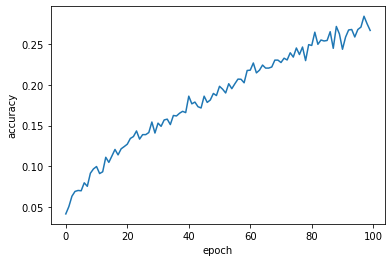

In [29]:
plt.plot(acc_hist)
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

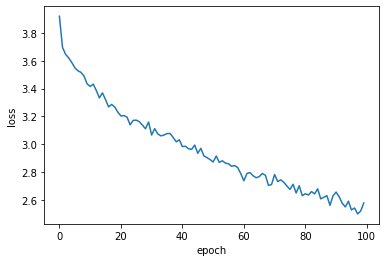

In [28]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'precision')

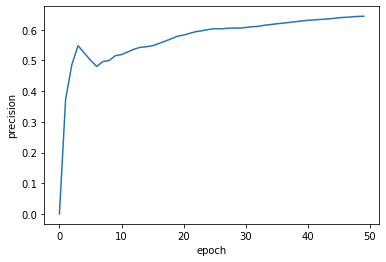

In [23]:
plt.plot(precision)
plt.xlabel('epoch')
plt.ylabel('precision')

Text(0, 0.5, 'val_acc')

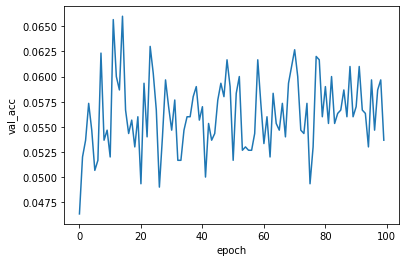

In [25]:
plt.plot(val_acc)
plt.xlabel('epoch')
plt.ylabel('val_acc')

Text(0, 0.5, 'val_loss')

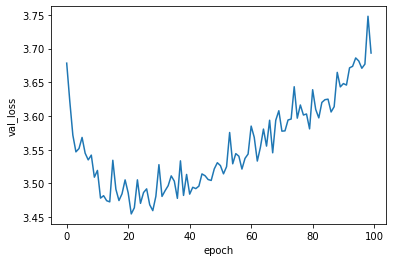

In [31]:
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('val_loss')

In [32]:
import pickle
with open('agemodel_11_scores', 'wb') as p:
    pickle.dump(scores, p)


In [16]:
age_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), 'mae'])
 
checkpointer = ModelCheckpoint(filepath='agemodel_11.hdf5',
                               monitor = "val_loss",
                               verbose=1,
                               save_best_only=True,
                               mode = 'auto')
 
scores = []
epochs = 100;
batch_size = 5100

for i in range(epochs):
    print("epoch ",i)
    ix_train = np.random.choice(strat_train_split.shape[0], size=batch_size)
    score = age_model.fit(train_x[ix_train], train_y[ix_train],
                          epochs=1,
                          validation_data=(valid_x, valid_y),
                          callbacks=[checkpointer])
    scores.append(score)

epoch  0
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 84s 17ms/step - loss: 3.9211 - accuracy: 0.0414 - precision: 0.0000e+00 - mae: 0.0192 - val_loss: 3.6783 - val_accuracy: 0.0463 - val_precision: 0.0000e+00 - val_mae: 0.0191

Epoch 00001: val_loss improved from inf to 3.67833, saving model to agemodel_10.hdf5
epoch  1
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 75s 15ms/step - loss: 3.6974 - accuracy: 0.0504 - precision: 0.2936 - mae: 0.0191 - val_loss: 3.6222 - val_accuracy: 0.0520 - val_precision: 0.2234 - val_mae: 0.0191

Epoch 00001: val_loss improved from 3.67833 to 3.62217, saving model to agemodel_10.hdf5
epoch  2
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 75s 15ms/step - loss: 3.6473 - accuracy: 0.0631 - precision: 0.2838 - mae: 0.0190 - val_loss: 3.5717 - val_accuracy: 0.0537 - val_precision: 0.3611 

Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 75s 15ms/step - loss: 2.9035 - accuracy: 0.1894 - precision: 0.6249 - mae: 0.0171 - val_loss: 3.5216 - val_accuracy: 0.0617 - val_precision: 0.6252 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487
epoch  49
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 75s 15ms/step - loss: 2.8897 - accuracy: 0.1869 - precision: 0.6262 - mae: 0.0170 - val_loss: 3.5308 - val_accuracy: 0.0590 - val_precision: 0.6264 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487
epoch  50
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 75s 15ms/step - loss: 2.8721 - accuracy: 0.1982 - precision: 0.6276 - mae: 0.0169 - val_loss: 3.5265 - val_accuracy: 0.0517 - val_precision: 0.6286 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487
epoch  51
Train o


Epoch 00001: val_loss did not improve from 3.45487
epoch  73
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 411s 81ms/step - loss: 2.7262 - accuracy: 0.2394 - precision: 0.6540 - mae: 0.0163 - val_loss: 3.5955 - val_accuracy: 0.0543 - val_precision: 0.6543 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487
epoch  74
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 411s 81ms/step - loss: 2.6989 - accuracy: 0.2341 - precision: 0.6549 - mae: 0.0163 - val_loss: 3.6434 - val_accuracy: 0.0573 - val_precision: 0.6553 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487
epoch  75
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 242s 47ms/step - loss: 2.6748 - accuracy: 0.2453 - precision: 0.6556 - mae: 0.0163 - val_loss: 3.5968 - val_accuracy: 0.0493 - val_precision: 0.6561 - val_mae: 0.0189

Epo


Epoch 00001: val_loss did not improve from 3.45487
epoch  98
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 76s 15ms/step - loss: 2.5194 - accuracy: 0.2751 - precision: 0.6687 - mae: 0.0156 - val_loss: 3.7479 - val_accuracy: 0.0597 - val_precision: 0.6693 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487
epoch  99
Train on 5100 samples, validate on 3000 samples
Epoch 1/1
5100/5100 [==============================] - 76s 15ms/step - loss: 2.5771 - accuracy: 0.2669 - precision: 0.6695 - mae: 0.0156 - val_loss: 3.6933 - val_accuracy: 0.0537 - val_precision: 0.6697 - val_mae: 0.0189

Epoch 00001: val_loss did not improve from 3.45487


#### Model Testing

##### on LAP test set

In [11]:
age_model.evaluate(test_x, test_y, verbose=1)


3884/3884 [==============================] - 818s 211ms/step


[4.1178539253533435, 0.0530381053686142, 0.0, 0.019103191792964935]

In [12]:
age_model.metrics_names

['loss', 'accuracy', 'precision', 'mae']

In [13]:
# Predict Model 
predictions = age_model.predict(test_x)
apparent_predictions = np.dot(predictions, np.arange(101).reshape(101, 1))

In [23]:
apparent_predictions.shape

(3884, 1)

##### MAE, NS, ACC, AND ERROR RATE

In [15]:
# MAE
actual = np.argmax(test_y, axis=1).reshape(3884, 1)
abs_error = abs(apparent_predictions - actual)
mae = np.sum(abs_error)
mae = mae/actual.shape[0]
mae

8.371627420086826

In [16]:
# correct predictions
good = []
for index_1, pred in enumerate(np.argmax(test_y, axis=1).tolist()):
    for index_2, j in enumerate(np.round(apparent_predictions).flatten().tolist()):
        if (pred == j) and (index_1==index_2):
                good.append(index_1)
        else:
            pass

In [21]:
good # 177 instances

[9,
 15,
 24,
 46,
 85,
 90,
 92,
 95,
 103,
 112,
 130,
 143,
 147,
 188,
 225,
 235,
 257,
 286,
 303,
 379,
 397,
 424,
 451,
 479,
 502,
 533,
 540,
 600,
 675,
 776,
 780,
 787,
 811,
 812,
 855,
 876,
 948,
 952,
 955,
 980,
 1016,
 1138,
 1150,
 1163,
 1175,
 1190,
 1213,
 1235,
 1238,
 1283,
 1287,
 1329,
 1361,
 1363,
 1366,
 1409,
 1419,
 1433,
 1439,
 1451,
 1510,
 1554,
 1555,
 1565,
 1647,
 1652,
 1659,
 1673,
 1679,
 1684,
 1704,
 1721,
 1744,
 1761,
 1810,
 1841,
 1866,
 1877,
 1881,
 1930,
 1933,
 1959,
 1963,
 1966,
 1973,
 2134,
 2144,
 2177,
 2182,
 2184,
 2190,
 2202,
 2206,
 2223,
 2224,
 2235,
 2283,
 2290,
 2298,
 2328,
 2342,
 2344,
 2362,
 2379,
 2398,
 2402,
 2413,
 2414,
 2416,
 2463,
 2495,
 2496,
 2520,
 2530,
 2531,
 2563,
 2569,
 2591,
 2617,
 2622,
 2642,
 2654,
 2664,
 2684,
 2690,
 2704,
 2740,
 2747,
 2749,
 2775,
 2836,
 2862,
 2871,
 2875,
 2879,
 2896,
 2897,
 2908,
 2921,
 3029,
 3054,
 3066,
 3069,
 3072,
 3080,
 3129,
 3171,
 3187,
 3189,
 3230,

In [17]:
print('accuracy of classifier on test set ', len(good)/3439)

accuracy of classifier on test set  0.051468450130851995


In [63]:
# for i in range(0, LAP_data.shape[0]):
a = (apparent_predictions - np.round(LAP_data['mean'].values.reshape(3884,1), decimals=2))**2
b = 2*(np.round(LAP_data['stdv'].values.reshape(3884,1), decimals=2)**2)
c = a/b
n_s = 1 - np.exp(-c)
print('normal score is %i'%np.mean(n_s))

C:\Users\Godswill Ikwan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


0.5711690325850948

##### on WIKI test set

In [20]:
#Evaluating model with test dataset 
age_model.evaluate(test_x, test_y, verbose=1)


3439/3439 [==============================] - 349s 101ms/step


[3.4800965981484846,
 0.05757487565279007,
 0.21141985058784485,
 0.01897370256483555]

In [75]:
age_model.metrics_names

['loss', 'accuracy', 'precision', 'mae']

In [21]:
# Predict Model 
predictions = age_model.predict(test_x)
apparent_predictions = np.dot(predictions, np.arange(101).reshape(101, 1))

In [35]:
data = {'real age': np.argmax(test_y, axis=1).tolist(), 'predicted_apparent age': np.round(apparent_predictions, decimals=2).tolist()}
pred_df = pd.DataFrame(data)
pred_df

,real age,predicted_apparent age
0,32,[30.86]
1,66,[68.71]
2,33,[22.95]
3,27,[29.43]
4,26,[31.89]
...,...,...
3434,29,[30.65]
3435,26,[33.84]
3436,51,[53.24]
3437,48,[51.89]


In [22]:
print('array of apparent predcitions: ', apparent_predictions)
print('array of apparent predcitions: ', apparent_predictions.shape)
print('prediction shape is: ', predictions.shape)
print('test shape is:', test_y.shape)

array of apparent predcitions:  [30.41721166 63.10059498 21.30074538 ... 56.60643162 48.69093987
 25.71468334]
array of apparent predcitions:  (3439,)
prediction shape is:  (3439, 101)
test shape is: (3439, 101)


##### Load test set and predictions if need be

In [206]:
# with open('predictions_agemodel10.npy', 'wb') as f:
#     np.save(f, predictions)


# with open('test_y.npy', 'rb') as f:
#     test_y = np.load(f)

# with open('predictions.npy', 'rb') as p:
#     predictions = np.load(p)


#### PRECISION, RECALL, ACCURACY AND MISCLASSIFICATION RATE CALCULATIONS

In [19]:
import random
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, multilabel_confusion_matrix, classification_report, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### MAE

In [22]:
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
abs_error = abs(apparent_predictions - actual)
mae = np.sum(abs_error)
mae = mae/actual.shape[0]
mae

6.5818871180188205

In [28]:
real_age_prediction = np.argmax(predictions, axis=1)
real_age_prediction

array([29, 59, 24, ..., 46, 53, 26], dtype=int64)

##### ACCURACY FOR REAL AND APPARENT AGES ON TEST SET

##### accuracy with tolerance of 2

In [43]:
good_pred = []
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
for i, x in enumerate(apparent_predictions):
    if (abs(np.round(apparent_predictions[i])-actual[i]) <= 2) and (abs(np.round(apparent_predictions[i])-actual[i]) >= -2):
        good_pred.append(1)
    else:
        good_pred.append(0)
        
print('number of correctly predicted test samples: %i' %np.sum(good_pred))
print('accuracy is : %i%%' %((np.sum(good_pred)/len(apparent_predictions)) * 100))

number of correctly predicted test samples: 890
accuracy is : 25%


##### accuracy with tolerance of 3

In [44]:
good_pred3 = []
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
for i, x in enumerate(apparent_predictions):
    if (abs(np.round(apparent_predictions[i])-actual[i]) <= 3) and (abs(np.round(apparent_predictions[i])-actual[i]) >= -3):
        good_pred3.append(1)
    else:
        good_pred3.append(0)
        
print('number of correctly predicted test samples: %i' %np.sum(good_pred3))
print('accuracy is : %i%%' %((np.sum(good_pred3)/len(apparent_predictions)) * 100))

number of correctly predicted test samples: 1237
accuracy is : 35%


##### accuracy with tolerance of 4

In [45]:
good_pred4 = []
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
for i, x in enumerate(apparent_predictions):
    if (abs(np.round(apparent_predictions[i])-actual[i]) <= 4) and (abs(np.round(apparent_predictions[i])-actual[i]) >= -4):
        good_pred4.append(1)
    else:
        good_pred4.append(0)
        
print('number of correctly predicted test samples: %i' %np.sum(good_pred4))
print('accuracy is : %i%%' %((np.sum(good_pred4)/len(apparent_predictions)) * 100))

number of correctly predicted test samples: 1553
accuracy is : 45%


##### accuracy with tolerance of 5

In [46]:
good_pred5 = []
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
for i, x in enumerate(apparent_predictions):
    if (abs(np.round(apparent_predictions[i])-actual[i]) <= 5) and (abs(np.round(apparent_predictions[i])-actual[i]) >= -5):
        good_pred5.append(1)
    else:
        good_pred5.append(0)
        
print('number of correctly predicted test samples: %i' %np.sum(good_pred5))
print('accuracy is : %i%%' %((np.sum(good_pred5)/len(apparent_predictions)) * 100))

number of correctly predicted test samples: 1850
accuracy is : 53%


##### accuracy with tolerance of 6

In [47]:
good_pred6 = []
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
for i, x in enumerate(apparent_predictions):
    if (abs(np.round(apparent_predictions[i])-actual[i]) <= 6) and (abs(np.round(apparent_predictions[i])-actual[i]) >= -6):
        good_pred6.append(1)
    else:
        good_pred6.append(0)
        
print('number of correctly predicted test samples: %i' %np.sum(good_pred6))
print('accuracy is : %i%%' %((np.sum(good_pred6)/len(apparent_predictions)) * 100))

number of correctly predicted test samples: 2106
accuracy is : 61%


##### accuracy with tolerance of 7

In [52]:
good_pred7 = []
actual = np.argmax(test_y, axis=1).reshape(3439, 1)
for i, x in enumerate(apparent_predictions):
    if (abs(np.round(apparent_predictions[i])-actual[i]) <= 7) and (abs(np.round(apparent_predictions[i])-actual[i]) >= -7):
        good_pred7.append(1)
    else:
        good_pred7.append(0)
        
print('number of correctly predicted test samples: %i' %np.sum(good_pred7))
print('accuracy is : %i%%' %((np.sum(good_pred7)/len(apparent_predictions)) * 100))

number of correctly predicted test samples: 2315
accuracy is : 67%


In [26]:
# correct predictions
good = []
for index_1, pred in enumerate(np.argmax(test_y, axis=1).tolist()):
    for index_2, j in enumerate(np.round(apparent_predictions).flatten().tolist()):
        if (pred == j) and (index_1==index_2):
                good.append(index_1)
        else:
            pass

In [197]:
good # 177 instances

[6,
 11,
 68,
 80,
 88,
 92,
 96,
 106,
 129,
 194,
 205,
 214,
 215,
 218,
 224,
 246,
 271,
 300,
 313,
 344,
 348,
 368,
 382,
 410,
 413,
 425,
 431,
 443,
 459,
 465,
 466,
 477,
 536,
 539,
 578,
 624,
 632,
 659,
 691,
 718,
 741,
 742,
 750,
 782,
 800,
 802,
 811,
 822,
 825,
 847,
 863,
 869,
 889,
 917,
 922,
 935,
 937,
 948,
 954,
 970,
 996,
 1026,
 1106,
 1118,
 1224,
 1228,
 1242,
 1268,
 1287,
 1301,
 1304,
 1316,
 1353,
 1358,
 1398,
 1412,
 1417,
 1454,
 1480,
 1498,
 1504,
 1505,
 1540,
 1551,
 1618,
 1631,
 1662,
 1675,
 1678,
 1689,
 1691,
 1729,
 1732,
 1828,
 1845,
 1854,
 1873,
 1882,
 1933,
 1949,
 1961,
 1962,
 2012,
 2015,
 2019,
 2054,
 2100,
 2104,
 2116,
 2124,
 2138,
 2156,
 2194,
 2226,
 2235,
 2265,
 2292,
 2311,
 2379,
 2390,
 2392,
 2394,
 2422,
 2434,
 2466,
 2483,
 2501,
 2514,
 2520,
 2522,
 2542,
 2543,
 2560,
 2589,
 2607,
 2667,
 2677,
 2686,
 2691,
 2702,
 2718,
 2736,
 2749,
 2766,
 2778,
 2794,
 2805,
 2818,
 2837,
 2864,
 2865,
 2868,
 2872

In [27]:
print('accuracy of classifier on test set ', len(good)/3439)

accuracy of classifier on test set  0.05379470776388485


##### ERROR RATE FOR APPARENT AGE PREDS ON TEST SET

In [71]:
preds = predictions
y_true = test_y

In [126]:
# wrong/false predictions = (FN+FP) for all classes
mislabels = []
for index_3, pred_2 in enumerate(np.argmax(test_y, axis=1).tolist()):
    for index_4, pred_3 in enumerate(np.round(apparent_predictions).flatten().tolist()):
        if (index_3 == index_4) and (pred_2 != pred_3):
            mislabels.append(index_4)
        else:
            pass

In [127]:
mislabels

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 93,
 94,
 95,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192

In [129]:
print('misclassification rate of classifier on test_set is ', len(mislabels)/3439)

misclassification rate of classifier on test_set is  0.948531549869148


##### PRECISION & RECALL w keras

In [37]:
precision = precision_score(np.argmax(test_y, axis=1).tolist(), np.round(np.dot(predictions, np.arange(101)), decimals=0).tolist(), average='micro')
print('precision is ', precision)
recall = recall_score(np.round(np.dot(test_y, np.arange(101))).tolist(), np.round(np.dot(predictions, np.arange(101)), decimals=0).tolist(), average='micro')
print('recall is ', recall)

accuracy = accuracy_score(np.argmax(test_y, axis=1).tolist(), np.round(apparent_predictions, decimals=0).tolist(), normalize=True)
print('accuracy is %f'%accuracy)

# DIDN'T WORK!!!

precision is  0.051468450130851995
recall is  0.051468450130851995
accuracy is 0.051468


In [42]:
print(classification_report(np.argmax(test_y, axis=1), np.round(apparent_predictions)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        46
           7       0.00      0.00      0.00        33
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        25
          16       0.00      0.00      0.00        49
          17       0.00      0.00      0.00        66
          18       0.00    

C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


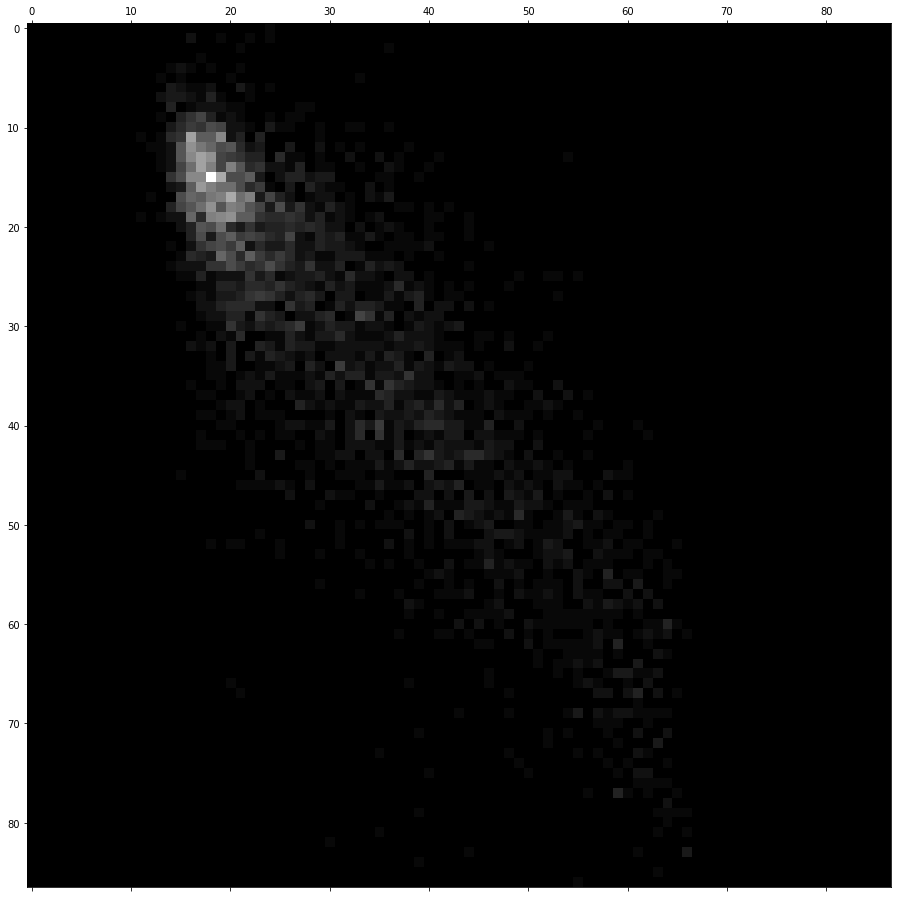

In [7]:
conf_mx = confusion_matrix(np.argmax(test_y, axis=1).tolist(), np.round(apparent_predictions).tolist())
figure = plt.axes((0,0,10,3))
figure.matshow(conf_mx, cmap='gray')
# conf_mx

In [50]:
np.argmax(test_y[[1, 2, 3]], axis=1)

array([66, 33, 27], dtype=int64)

### HELPER FUNCTIONS

In [11]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
 
def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img, dtype='uint8').reshape(1, -1)[0]
    face_arr = extractFace(test_img_arr)
    face_arr /= 255
    try:
        face_arr = face_arr.reshape(1, 224,224,3)
        return face_arr
    except AttributeError:
        print(face_arr)

def showImage(face_arr):
    face_arr = face_arr*255
    return plt.imshow(face_arr.astype('uint8').reshape(224, 224, 3))

def plotGoodPredictions(test_x, test_y, apparent_predictions, good_indices):
    figure = plt.figure(figsize=(20, 8))
    good_indices = random.sample(good_indices, 15)
    for i, index in enumerate(good_indices):
#     for i, index in enumerate(np.random.choice(len(good_indices), size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        
        # Display each image
        image = test_x[index]*255
        ax.imshow(image.astype('uint8'))
        true_index = np.argmax(test_y[index])
        
        # Set the title for each image
        ax.set_title("Apparent:{} || Real:{}".format(np.round(apparent_predictions[index]), true_index),
                     color=("green" if np.round(apparent_predictions[index], decimals=0) == true_index else "red"))
        if i == 14:
            break


def plotRandomImages(test_x, test_y, apparent_predictions):
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        
        # Display each image
        image = test_x[index]*255
        ax.imshow(image.astype('uint8'))
        true_index = np.argmax(test_y[index])
        
        # Set the title for each image
        ax.set_title("Apparent:{} || Real:{}".format(np.round(apparent_predictions[index]), true_index),
                     color=("green" if np.round(apparent_predictions[index], decimals=0) == true_index else "red"))

Using TensorFlow backend.
C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\t

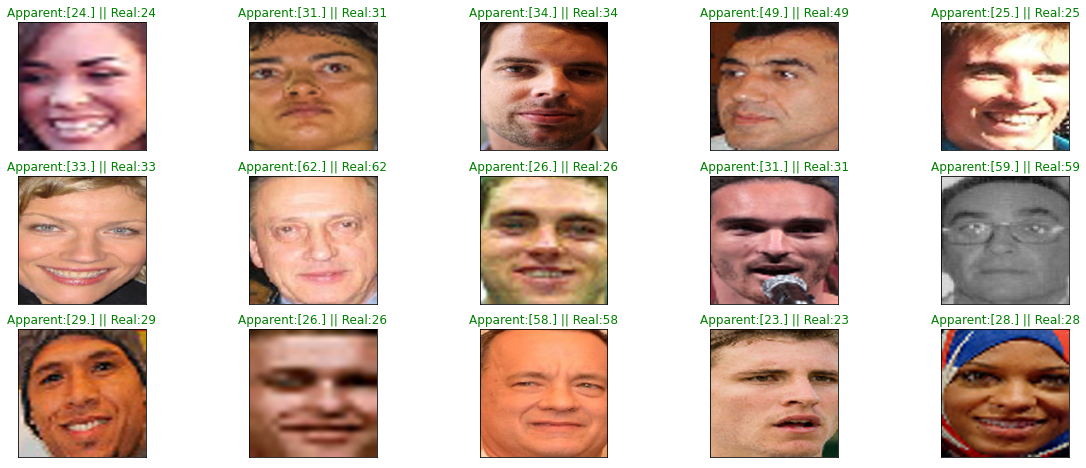

In [208]:
plotGoodPredictions(test_x, test_y, apparent_predictions, good)

In [161]:
apparent_predictions

array([47.70674152, 62.2633103 , 27.6149616 , ..., 56.606426  ,
       48.69093051, 25.71468224])

### SAMPLE 1

In [24]:
output_indices = np.array([i for i in range(0, 101)])

In [ ]:
output_indices

In [10]:
picture = "C:\\Users\\Godswill Ikwan\\Documents\\Project\\NEW\\Dataset\\samples\\me.jpg"
prediction_me = age_model.predict(loadImage(picture))

In [11]:
prediction_me

array([[6.9650294e-09, 2.4054620e-05, 5.5815268e-09, 6.1446821e-09,
        5.6511884e-09, 1.3344273e-06, 6.1662417e-05, 1.6894995e-04,
        2.4730904e-04, 2.6260479e-04, 1.7442682e-04, 1.3587004e-06,
        5.0274800e-03, 5.3368947e-03, 1.1440037e-02, 1.3529186e-02,
        1.4329490e-02, 1.7051963e-02, 4.3437392e-02, 5.1820759e-02,
        8.8292256e-02, 8.1272371e-02, 8.5630879e-02, 1.1510997e-01,
        8.7535657e-02, 8.6989082e-02, 5.8227688e-02, 4.4106938e-02,
        3.7385140e-02, 3.0649504e-02, 2.4198240e-02, 2.6593823e-02,
        1.2325238e-02, 1.3747896e-02, 8.6773168e-03, 8.9413980e-03,
        6.0238508e-03, 3.1195288e-03, 3.9948341e-03, 2.3504831e-03,
        1.1332675e-03, 2.0363566e-03, 2.0313119e-03, 1.5271023e-03,
        9.0213085e-04, 5.1102345e-04, 7.5331732e-04, 3.0667664e-04,
        4.2060384e-04, 3.3547121e-04, 3.3177793e-04, 1.7270035e-04,
        3.9223925e-04, 2.1108083e-04, 8.2593739e-05, 1.1392888e-04,
        6.9751237e-05, 1.5238159e-04, 5.7146881e

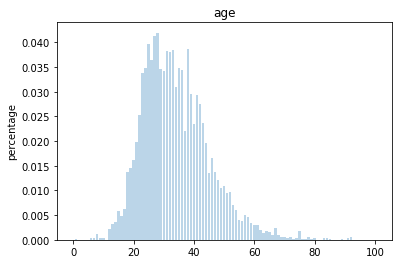

In [23]:
y_pos = np.arange(101)
plt.bar(y_pos, prediction_me[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

most dominant age class (not apparent age):  23
apparent age:  24
real age: 21


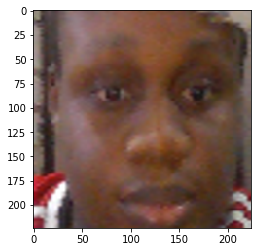

In [16]:
me = image.load_img(picture)
plt.imshow(me)

sample_b = loadImage(picture)
sample_b*= 255
sample_b = sample_b.astype('uint8')
plt.imshow(sample_b.reshape(224, 224,3))

print("most dominant age class (not apparent age): ",np.argmax(prediction_me))
 
apparent_age = np.round(np.sum(prediction_me * output_indices, axis = 1))
print("apparent age: ", int(apparent_age[0]))
print('real age: 21')

### SAMPLE 2

In [74]:
mom2 = "C:\\Users\\Godswill Ikwan\\Documents\\Project\\NEW\\Dataset\\samples\\mom2.jpg"
prediction_mom2 = age_model.predict(loadImage(mom2))

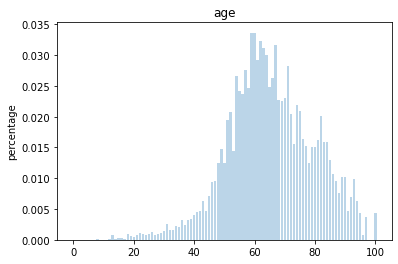

In [75]:
y_pos = np.arange(101)
plt.bar(y_pos, prediction_mom2[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

In [ ]:
img = image.load_img(mom2)
plt.imshow(img)

sample_c = loadImage(mom2)
sample_c*= 255
sample_c = sample_c.astype('uint8')
plt.imshow(sample_c.reshape(224, 224,3))

print("most dominant age class (not apparent age): ",np.argmax(prediction_mom2))
 
apparent_age = np.round(np.sum(prediction_mom2 * output_indices, axis = 1))
print("apparent age: ", int(apparent_age[0]))

### SAMPLE 3

In [33]:
dad = "C:\\Users\\Godswill Ikwan\\Documents\\Project\\NEW\\Dataset\\samples\\dad.jpg"
prediction_dad = age_model.predict(loadImage(dad))

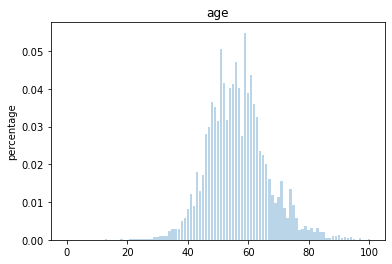

In [34]:
y_pos = np.arange(101)
plt.bar(y_pos, prediction_dad[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

In [ ]:
dad_im = loadImage(dad)
showImage(dad_im)

print("most dominant age class (not apparent age): ",np.argmax(prediction_dad))
 
apparent_age = np.round(np.sum(prediction_dad*output_indices, axis=1))
print("apparent age: ", int(apparent_age[0]))

### SAMPLE 4

In [26]:
# dad = "C:\\Users\\Godswill Ikwan\\Documents\\Project\\NEW\\Dataset\\samples\\dad.jpg"
y_hat = age_model.predict(test_x[49].reshape(1, 224, 224, 3))

In [27]:
y_hat.shape

(1, 101)

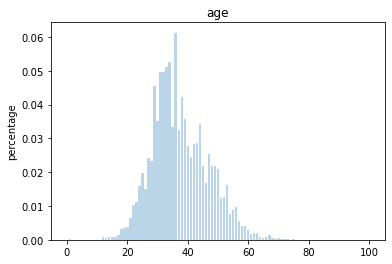

In [37]:
y_pos = np.arange(101)
plt.bar(y_pos, y_hat[0], align='center', alpha=0.3)
plt.ylabel('percentage')
plt.title('age')
plt.show()

most dominant age class (not apparent age):  22
apparent age:  26
real age:  26


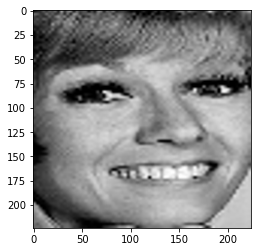

In [33]:
showImage(test_x[49])

print("most dominant age class (not apparent age): ",np.argmax(y_hat))
 
apparent_age = np.round(np.sum(y_hat*output_indices, axis=1))
print("apparent age: ", int(apparent_age))
print('real age: ', np.argmax(test_y[49]))

In [39]:
import joblib

joblib.dump(age_model, 'agemodel_7_5500_50_6.451.pkl')


['agemodel_7_5500_50_6.451.pkl']

## GENDER MODEL

### Preparing Input & Output

In [0]:
#Gender Prediction 

In [12]:
# stratified sampling for gender 
# df['age_groups'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100, np.inf],
#                           labels=[1, 2, 3, 4, 5, 6])
# df.head()
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(finalBatch, finalBatch['gender']):
#     print(train_index)
    gender_strat_train_split = finalBatch.iloc[train_index]
    gender_strat_test_split = finalBatch.iloc[test_index]

In [14]:
gender_strat_train_split

,full_path,gender,age,pixels,face_pixels
36685,[83/18589083_1973-09-05_2008.jpg],0.0,35,"[3, 5, 0, 1, 3, 0, 3, 5, 0, 3, 5, 0, 5, 4, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
56154,[74/3989574_1942-12-30_2011.jpg],1.0,69,"[116, 52, 52, 115, 49, 50, 126, 58, 59, 104, 3...","[0.1608, 0.1686, 0.1686, 0.1804, 0.1804, 0.180..."
44732,[96/21746696_1985-08-08_2012.jpg],1.0,27,"[182, 206, 118, 189, 213, 125, 198, 222, 136, ...","[0.8115, 0.9253, 0.961, 0.816, 0.933, 0.965, 0..."
21234,[04/6330404_1931-08-15_1973.jpg],0.0,42,"[53, 53, 53, 48, 48, 48, 45, 45, 45, 44, 44, 4...","[0.957, 0.957, 0.957, 0.957, 0.957, 0.957, 0.9..."
56149,[67/398867_1974-05-29_2002.jpg],1.0,28,"[65, 81, 97, 64, 80, 96, 64, 80, 96, 71, 84, 1...","[0.1294, 0.1569, 0.2196, 0.1255, 0.153, 0.2157..."
...,...,...,...,...,...
61153,[52/37973752_1990-06-09_2014.jpg],1.0,24,"[94, 160, 174, 136, 178, 190, 154, 177, 193, 1...","[0.1843, 0.1098, 0.0863, 0.1843, 0.1098, 0.086..."
38174,[11/7067411_1986-04-26_2011.jpg],1.0,25,"[52, 53, 57, 52, 53, 57, 53, 54, 56, 47, 48, 5...","[0.2627, 0.2471, 0.2432, 0.251, 0.2354, 0.2313..."
853,[22/210222_1927-09-20_1976.jpg],0.0,49,"[194, 195, 189, 183, 184, 178, 180, 181, 175, ...","[0.3098, 0.306, 0.2903, 0.302, 0.298, 0.2825, ..."
32695,[14/9155814_1930-02-23_1952.jpg],1.0,22,"[237, 206, 160, 235, 204, 158, 234, 203, 157, ...","[0.4548, 0.341, 0.3176, 0.447, 0.3333, 0.306, ..."


In [15]:
gender_strat_test_split

,full_path,gender,age,pixels,face_pixels
1829,[45/42014445_1959-09-28_1989.jpg],1.0,30,"[50, 50, 50, 47, 47, 47, 46, 46, 46, 46, 46, 4...","[0.0941, 0.0941, 0.0941, 0.0941, 0.0941, 0.094..."
59312,[21/249621_1962-06-10_2011.jpg],0.0,49,"[40, 48, 71, 43, 50, 78, 46, 52, 88, 53, 57, 1...","[0.06665, 0.05884, 0.0784, 0.06665, 0.05884, 0..."
11854,[24/19178524_1976-03-24_2004.jpg],0.0,28,"[98, 77, 60, 95, 74, 57, 93, 74, 57, 107, 90, ...","[0.4275, 0.396, 0.3843, 0.451, 0.4197, 0.408, ..."
18706,[82/1038582_1924-10-29_1956.jpg],1.0,32,"[19, 9, 18, 16, 6, 15, 14, 4, 13, 16, 6, 14, 1...","[0.02745, 0.011765, 0.01569, 0.02745, 0.011765..."
21519,[68/243368_1970-03-24_1990.jpg],0.0,20,"[22, 17, 13, 21, 16, 12, 25, 22, 17, 24, 23, 1...","[0.1177, 0.098, 0.0863, 0.1137, 0.0941, 0.0784..."
...,...,...,...,...,...
5427,[03/28062403_1987-04-17_2015.jpg],1.0,28,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[1.0, 1.0, 0.9844, 1.0, 1.0, 0.9844, 1.0, 1.0,..."
12905,[04/8029204_1965-08-27_2014.jpg],1.0,49,"[193, 149, 112, 192, 148, 111, 192, 148, 111, ...","[0.7764, 0.6196, 0.4863, 0.7607, 0.612, 0.4863..."
58610,[95/2395995_1932-11-24_1962.jpg],1.0,30,"[230, 230, 230, 232, 232, 232, 237, 237, 237, ...","[0.8823, 0.8823, 0.8823, 0.8706, 0.8706, 0.870..."
46132,[41/1379641_1956-09-06_2011.jpg],1.0,55,"[96, 54, 29, 97, 55, 30, 94, 52, 27, 94, 52, 2...","[0.00392, 0.011765, 0.0, 0.0784, 0.0902, 0.070..."


In [13]:
gender_train_x = []

for i in range(0, gender_strat_train_split.shape[0]):
    gender_train_x.append(gender_strat_train_split['face_pixels'].values[i])

gender_train_x = np.array(gender_train_x)
gender_train_x = gender_train_x.reshape(gender_train_x.shape[0], 224, 224, 3)

In [14]:
gender_test_x = []
for i in range(0, gender_strat_test_split.shape[0]):
    gender_test_x.append(gender_strat_train_split['face_pixels'].values[i])
    
gender_test_x = np.array(gender_test_x).reshape(len(gender_test_x), 224, 224, 3)

In [15]:
gender_train_y = keras.utils.to_categorical(gender_strat_train_split['gender'].values, 2)
gender_test_y = keras.utils.to_categorical(gender_strat_test_split['gender'].values, 2)

In [16]:
gender_valid_x, gender_valid_y = (gender_test_x[0:3000], gender_test_y[0:3000])
gender_test_x, gender_test_y = (gender_test_x[2500:], gender_test_y[2500:])

In [17]:
for layer in model.layers[:-7]:
    layer.trainable = False
    base_model_output = Sequential()
    base_model_output = Conv2D(2, (1, 1), name='predictions')(model.layers[-4].output)
    base_model_output = Flatten()(base_model_output)
    base_model_output = Activation('softmax')(base_model_output)
    gender_model = Model(inputs=model.input, outputs=base_model_output)

In [18]:
gender_model.load_weights('gendermodel_1.hdf5')

#### Model Training

In [18]:
scores = []
epochs = 30; batch_size = 3000

gender_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 
                                                                                 tf.keras.metrics.Precision(),
                                                                                 tf.keras.metrics.Recall()])
checkpointer = ModelCheckpoint(filepath='gendermodel_3.hdf5', monitor = "val_loss", verbose=1, save_best_only=True, mode = 'auto')

for i in range(epochs):
    print("epoch ",i)
    ix_train = np.random.choice(gender_strat_train_split.shape[0], size=batch_size)
    score = gender_model.fit(gender_train_x[ix_train], gender_train_y[ix_train], epochs=1, validation_data=(gender_valid_x, gender_valid_y), callbacks=[checkpointer])
    scores.append(score)

epoch  0
Train on 3000 samples, validate on 3000 samples
Epoch 1/1
3000/3000 [==============================] - 286s 95ms/step - loss: 0.2348 - accuracy: 0.9147 - precision: 0.8764 - recall: 0.8764 - val_loss: 2.8325 - val_accuracy: 0.5970 - val_precision: 0.8145 - val_recall: 0.8145

Epoch 00001: val_loss improved from inf to 2.83250, saving model to gendermodel_2.hdf5
epoch  1
Train on 3000 samples, validate on 3000 samples
Epoch 1/1
3000/3000 [==============================] - 258s 86ms/step - loss: 0.1801 - accuracy: 0.9413 - precision: 0.7915 - recall: 0.7915 - val_loss: 3.2839 - val_accuracy: 0.5787 - val_precision: 0.7834 - val_recall: 0.7834

Epoch 00001: val_loss did not improve from 2.83250
epoch  2
Train on 3000 samples, validate on 3000 samples
Epoch 1/1
3000/3000 [==============================] - 258s 86ms/step - loss: 0.1150 - accuracy: 0.9670 - precision: 0.7802 - recall: 0.7802 - val_loss: 3.0677 - val_accuracy: 0.5897 - val_precision: 0.7802 - val_recall: 0.7802

Epoc

3000/3000 [==============================] - 67s 22ms/step - loss: 0.0438 - accuracy: 0.9870 - precision: 0.7780 - recall: 0.7780 - val_loss: 5.9796 - val_accuracy: 0.5787 - val_precision: 0.7780 - val_recall: 0.7780

Epoch 00001: val_loss did not improve from 2.83250
epoch  25
Train on 3000 samples, validate on 3000 samples
Epoch 1/1
3000/3000 [==============================] - 67s 22ms/step - loss: 0.0566 - accuracy: 0.9840 - precision: 0.7781 - recall: 0.7781 - val_loss: 5.9329 - val_accuracy: 0.5763 - val_precision: 0.7781 - val_recall: 0.7781

Epoch 00001: val_loss did not improve from 2.83250
epoch  26
Train on 3000 samples, validate on 3000 samples
Epoch 1/1
3000/3000 [==============================] - 67s 22ms/step - loss: 0.0537 - accuracy: 0.9833 - precision: 0.7782 - recall: 0.7782 - val_loss: 6.8291 - val_accuracy: 0.5720 - val_precision: 0.7781 - val_recall: 0.7781

Epoch 00001: val_loss did not improve from 2.83250
epoch  27
Train on 3000 samples, validate on 3000 samples

In [23]:
gender_history = [score.history for score in scores]

gender_acc_hist = [acc['accuracy'] for acc in gender_history]
gender_val_acc = [val_acc['val_accuracy'] for val_acc in gender_history]
gender_losses = [loss['loss'] for loss in gender_history]
gender_precision = [prec['precision'] for prec in gender_history]
gender_recall = [rec['recall'] for rec in gender_history]
gender_val_loss = [val_loss['val_loss'] for val_loss in gender_history]

Text(0, 0.5, 'accuracy')

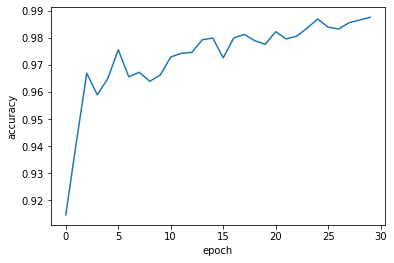

In [24]:
plt.plot(gender_acc_hist)
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'val_acc')

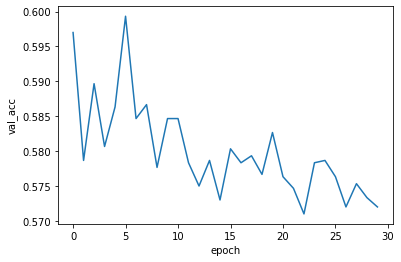

In [25]:
plt.plot(gender_val_acc)
plt.xlabel('epoch')
plt.ylabel('val_acc')

Text(0, 0.5, 'val_loss')

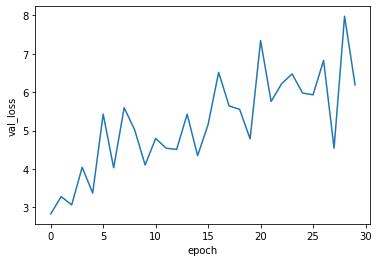

In [26]:
plt.plot(gender_val_loss)
plt.xlabel('epoch')
plt.ylabel('val_loss')

Text(0, 0.5, 'loss')

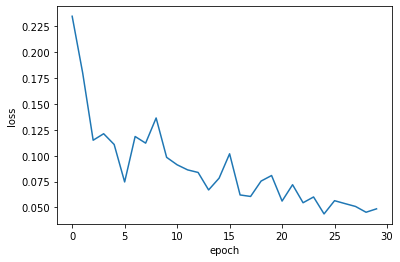

In [27]:
plt.plot(gender_losses)
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'precision')

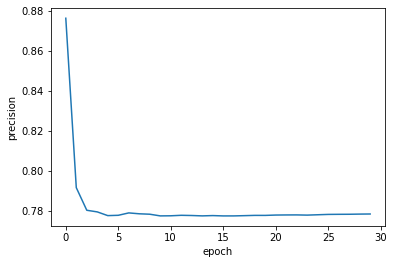

In [28]:
plt.plot(gender_precision)
plt.xlabel('epoch')
plt.ylabel('precision')

In [22]:
import pickle
with open('gendermodel2_scores', 'wb') as p:
    pickle.dump(scores, p)


In [21]:
#Evaluate Model 
gender_model.evaluate(gender_test_x, gender_test_y, verbose=1)

3939/3939 [==============================] - 35s 9ms/step


[5.894104555918802, 0.5897436141967773, 0.7746058702468872, 0.7746058702468872]

In [22]:
gender_model.metrics_names

['loss', 'accuracy', 'precision', 'recall']

In [19]:
predictions = gender_model.predict(gender_test_x)

In [20]:
data = {'gender': np.argmax(gender_test_y, axis=1).tolist(), 'predicted_gender': np.argmax(predictions, axis=1).tolist()}
pred_df = pd.DataFrame(data)
pred_df

,gender,predicted_gender
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
3934,1,1
3935,1,1
3936,1,1
3937,1,0


#### CONFUSION MAT, PRECISION, RECALL, ACCURACY AND MISCLASSIFCATION RATE

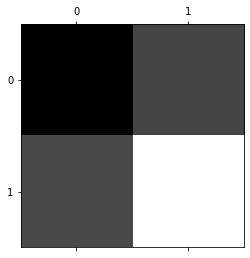

In [36]:
#Draw a confusion matrix  
from sklearn.metrics import classification_report, confusion_matrix

# np.argmax(gender_test_y, axis=1)
# np.argmax(predictions, axis=1)
gender_conf_mx = confusion_matrix(np.argmax(gender_test_y, axis=1), np.argmax(predictions, axis=1))
plt.matshow(gender_conf_mx, cmap='gray')

In [31]:
print(classification_report(np.argmax(gender_test_y, axis=1), np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.30      0.31      0.31      1154
           1       0.71      0.71      0.71      2785

    accuracy                           0.59      3939
   macro avg       0.51      0.51      0.51      3939
weighted avg       0.59      0.59      0.59      3939



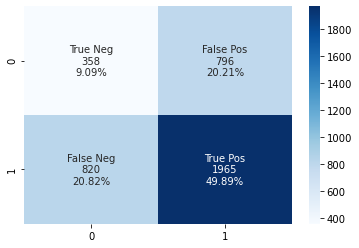

In [37]:
# a nice heat map example
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                gender_conf_mx.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     gender_conf_mx.flatten()/np.sum(gender_conf_mx)]
labels = [f'{v1}\n{v2}\n{v3}'for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gender_conf_mx, annot=labels, fmt='', cmap='Blues')

In [38]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

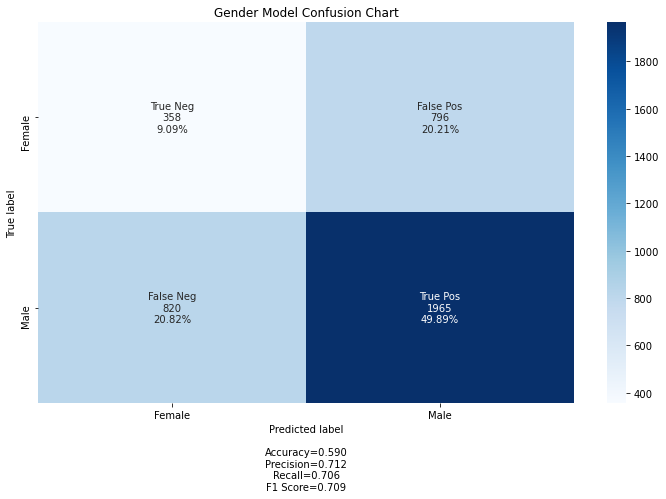

In [39]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Female', 'Male']
make_confusion_matrix(gender_conf_mx, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues', figsize=(12, 7), title='Gender Model Confusion Chart')

In [31]:
print(np.squeeze(np.argmax(gender_test_y, axis=1).shape))
print(predictions.shape)

3939
(3939, 2)


In [32]:
# actual = np.argmax(gender_test_y, axis=1)
abs_error = abs(predictions - gender_test_y)
mae = np.sum(abs_error)
mae = mae/gender_test_y.shape[0]
mae

0.8256255181557819

In [233]:
predictions[1]

array([0.00135685, 0.9986431 ], dtype=float32)

### HELPER FUNCTIONS

In [19]:
def plotGenderPred(gender_test_y, gender_test_x, predictions):
    figure = plt.figure(figsize=(20, 8))
    for i, index in enumerate(np.random.choice(gender_test_x.shape[0], size=15, replace=False)):
        ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
        
        # Display each image
        image = gender_test_x[index]*255
        ax.imshow(image.astype('uint8'))
        true_index = np.argmax(gender_test_y[index])
        true_gender = 'Male' if true_index==1 else 'Female'
        # Set the title for each image
        if np.argmax(predictions[index])==1:
            ax.set_title('{}({})'.format("Male", true_gender),
                     color=("green" if np.argmax(predictions[index]) == true_index else "red"))
        else:
             ax.set_title('{}({})'.format("Female", true_gender),
                     color=("green" if np.argmax(predictions[index]) == true_index else "red"))

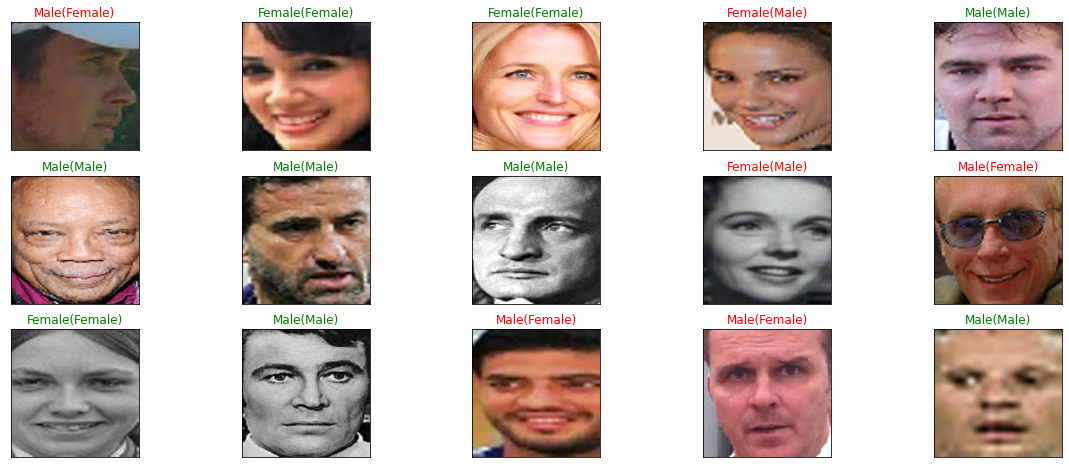

In [244]:
plotGenderPred(gender_test_y, gender_test_x, predictions)

gender:  Male


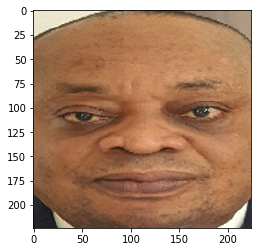

In [20]:
dad = "C:\\Users\\Godswill Ikwan\\Documents\\Project\\NEW\\Dataset\\samples\\dad.jpg"
prediction_dad = gender_model.predict(loadImage(dad))
dad_im = loadImage(dad)
showImage(dad_im)
gender = "Male" if np.argmax(prediction_dad) == 1 else "Female"
print("gender: ", gender)

In [21]:
prediction_dad

array([[0.00643192, 0.9935681 ]], dtype=float32)

In [43]:
finalBatch

,full_path,gender,age,pixels,face_pixels
0,[17/10000217_1981-05-05_2009.jpg],1.0,28,"[252, 252, 240, 252, 252, 240, 253, 253, 241, ...","[0.1216, 0.3726, 0.612, 0.1137, 0.3687, 0.608,..."
2,[12/100012_1948-07-03_2008.jpg],1.0,60,"[92, 96, 97, 90, 94, 95, 88, 92, 91, 88, 92, 9...","[0.1726, 0.1921, 0.1647, 0.1882, 0.2079, 0.180..."
4,[16/10002116_1971-05-31_2012.jpg],0.0,41,"[49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8, 2, 49, 8...","[0.306, 0.1216, 0.051, 0.306, 0.1216, 0.051, 0..."
5,[02/10002702_1960-11-09_2012.jpg],0.0,52,"[120, 101, 87, 122, 100, 86, 106, 93, 87, 88, ...","[0.8433, 0.6274, 0.4236, 0.8394, 0.6196, 0.419..."
6,[41/10003541_1937-09-27_1971.jpg],1.0,34,"[198, 198, 200, 197, 196, 201, 196, 195, 201, ...","[0.4587, 0.4236, 0.4548, 0.443, 0.4236, 0.447,..."
...,...,...,...,...,...
13084,[57/2120557_1916-05-06_1943.jpg],1.0,27,"[87, 87, 87, 79, 79, 79, 87, 87, 87, 77, 77, 7...","[0.3726, 0.3726, 0.3726, 0.3687, 0.3687, 0.368..."
13085,[68/212068_1940-09-07_2014.jpg],1.0,74,"[81, 133, 172, 79, 131, 170, 79, 131, 170, 78,...","[0.5767, 0.5767, 0.5605, 0.6, 0.596, 0.5806, 0..."
13087,[32/21207432_1971-04-12_2008.jpg],0.0,37,"[52, 56, 55, 53, 57, 56, 53, 55, 54, 57, 59, 5...","[0.196, 0.1569, 0.1333, 0.1921, 0.1569, 0.1333..."
13088,[99/21207499_1982-03-24_2014.jpg],1.0,32,"[249, 187, 100, 248, 189, 99, 247, 188, 98, 24...","[0.341, 0.3333, 0.255, 0.3372, 0.3293, 0.251, ..."


In [46]:
joblib.dump(gender_model, 'gendermodel_1_2000_20_.pkl')


C:\Users\Godswill Ikwan\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['age_model_3_5000_10_10.03266.pkl']

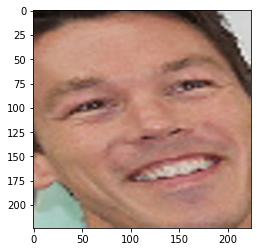

In [68]:
pic_a = finalBatch['face_pixels'].values[9]*255
plt.imshow(pic_a.astype('uint8').reshape(224,224,3))

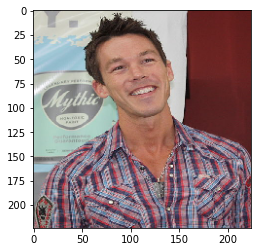

In [70]:
pic_b = finalBatch['pixels'].values[9]
plt.imshow(pic_b.astype('uint8').reshape(224,224,3))

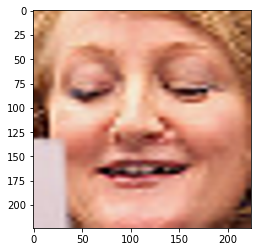

In [57]:
pic_c = finalBatch['face_pixels'].values[3]*255
plt.imshow(pic_c.astype('uint8').reshape(224,224,3))

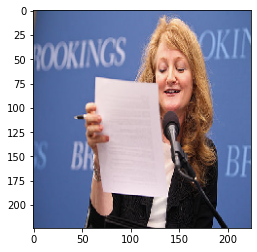

In [56]:
pic_d = finalBatch['pixels'].values[3]
plt.imshow(pic_d.astype('uint8').reshape(224,224,3))